In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense


In [4]:
df = pd.read_csv(r"C:\Users\vatch\Downloads\archive (47)\twitter.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
print("🔹 First 5 rows of dataset:")
print(df.head())

🔹 First 5 rows of dataset:
   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [6]:
texts = df['tweet'].astype(str).values
labels = df['label'].values

In [8]:
print("texts:",texts)
print("labels:",labels)

texts: [' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"
 '  bihday your majesty' ...
 'listening to sad songs on a monday morning otw to work is sad  '
 '@user #sikh #temple vandalised in in #calgary, #wso condemns  act  '
 'thank you @user for you follow  ']
labels: [0 0 0 ... 0 1 0]


In [9]:
vocab_size = 5000
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [10]:
max_len = 100
X = pad_sequences(sequences, maxlen=max_len, padding='post')
y = np.array(labels)

In [11]:
print(X)
print(y)

[[   2   35    5 ...    0    0    0]
 [   2    2  171 ...    0    0    0]
 [  63   27 3423 ...    0    0    0]
 ...
 [1098    4  122 ...    0    0    0]
 [   2 1608 1294 ...    0    0    0]
 [ 176    7    2 ...    0    0    0]]
[0 0 0 ... 0 1 0]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=100, input_length=max_len, name='embedding'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

D:\folder desktop\ttttt\env\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
print("\n🔹 Training the model...")
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


🔹 Training the model...
Epoch 1/5
640/640 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9269 - loss: 0.2169 - val_accuracy: 0.9560 - val_loss: 0.1336
Epoch 2/5
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9755 - loss: 0.0726 - val_accuracy: 0.9531 - val_loss: 0.1424
Epoch 3/5
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9941 - loss: 0.0230 - val_accuracy: 0.9527 - val_loss: 0.1890
Epoch 4/5
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9982 - loss: 0.0075 - val_accuracy: 0.9537 - val_loss: 0.2277
Epoch 5/5
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9535 - val_loss: 0.2624
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9561 - loss: 0.2335

✅ Test Accuracy: 0.9532


In [15]:
embedding_layer = model.get_layer('embedding')
embedding_weights = embedding_layer.get_weights()[0]  

In [ ]:
N = 300  
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embedding_2d = tsne.fit_transform(embedding_weights[:N])

D:\folder desktop\ttttt\env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


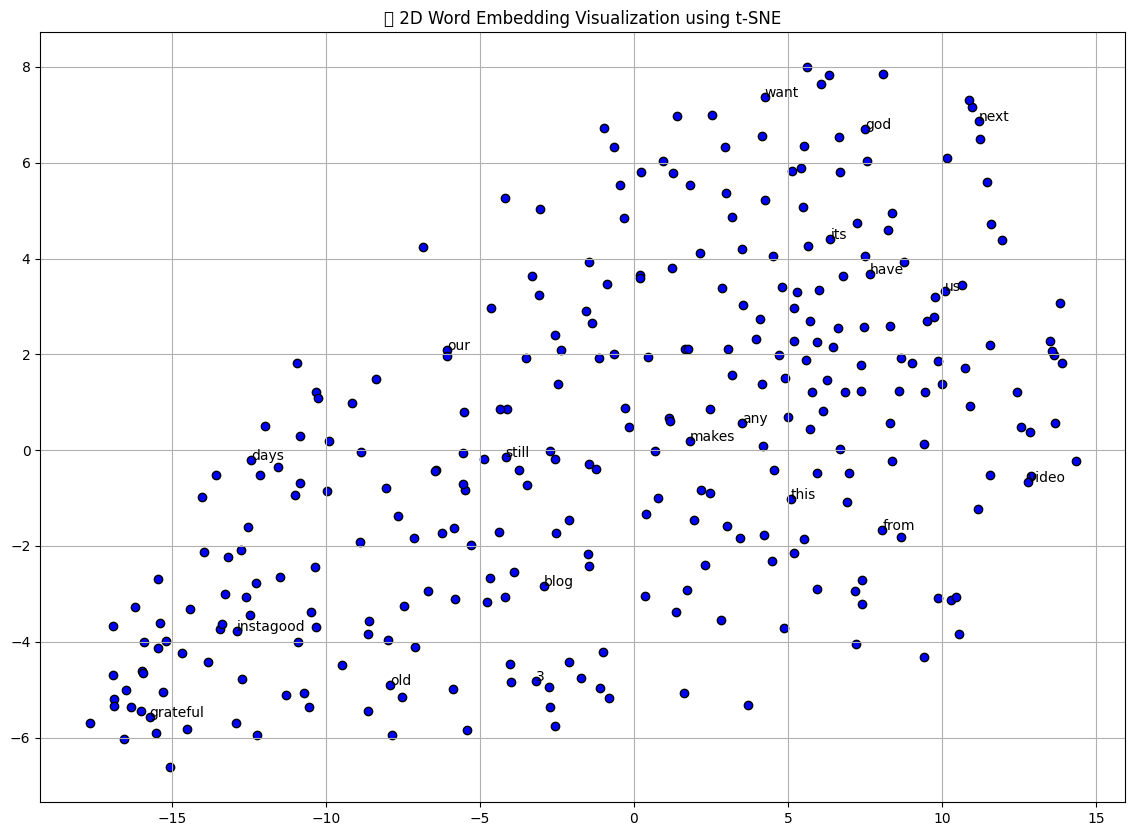

In [16]:
plt.figure(figsize=(14, 10))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c='blue', edgecolors='k')

for i in range(0, N, 15):
    word = index_word.get(i, "")
    plt.annotate(word, (embedding_2d[i, 0], embedding_2d[i, 1]))

plt.title("🔹 2D Word Embedding Visualization using t-SNE")
plt.grid(True)
plt.show()
